In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***Answer of the Question 3:***

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/content/sample_data/students_m6.csv')
data

,StudentID,FirstName,LastName,Major,HighSchoolGPA,FamilyIncome,State,AvgDailyStudyTime,TotalAbsence,FirstYearGPA,isGRA
0,202303595,Baxter,Dengler,Computer Science,2.82,45013,WA,2.01,14.0,1.93,0
1,202309162,Christian,Wickey,Data Science,3.07,128358,GA,5.41,NaN,2.76,0
2,202306337,Lonnie,Wulff,Software Engineering,2.68,112392,GA,9.57,13.0,3.09,0
3,202306072,Mitchell,Deshotel,Software Engineering,3.21,190846,GA,8.57,16.0,3.08,0
4,202301733,Linwood,Willing,Information Technology,3.44,187163,GA,6.24,20.0,2.73,0
...,...,...,...,...,...,...,...,...,...,...,...
995,202302372,Michael,Richman,Computer Science,4.00,32210,SC,8.84,16.0,3.31,1
996,202309892,Lacy,Anton,Software Engineering,3.02,163481,GA,6.61,17.0,2.53,0
997,202308310,Ell,Benke,Software Engineering,2.05,45446,GA,3.68,30.0,1.77,0
998,202305648,Elzie,Enderle,Information Technology,2.19,44714,GA,2.74,17.0,2.11,0


In [48]:
X = data.drop(columns=['isGRA'])
y = data['isGRA']

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [50]:
num_cols= ['HighSchoolGPA', 'FamilyIncome', 'AvgDailyStudyTime', 'TotalAbsence']
cat_cols= ['Major', 'State']
cls_target = 'isGRA'

num_transformer = Pipeline (steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)

])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Training Accuracy:', train_accuracy)
print('Test Accuray:', test_accuracy)


Training Accuracy: 1.0
Test Accuray: 0.84


In [51]:
from sklearn.tree import plot_tree


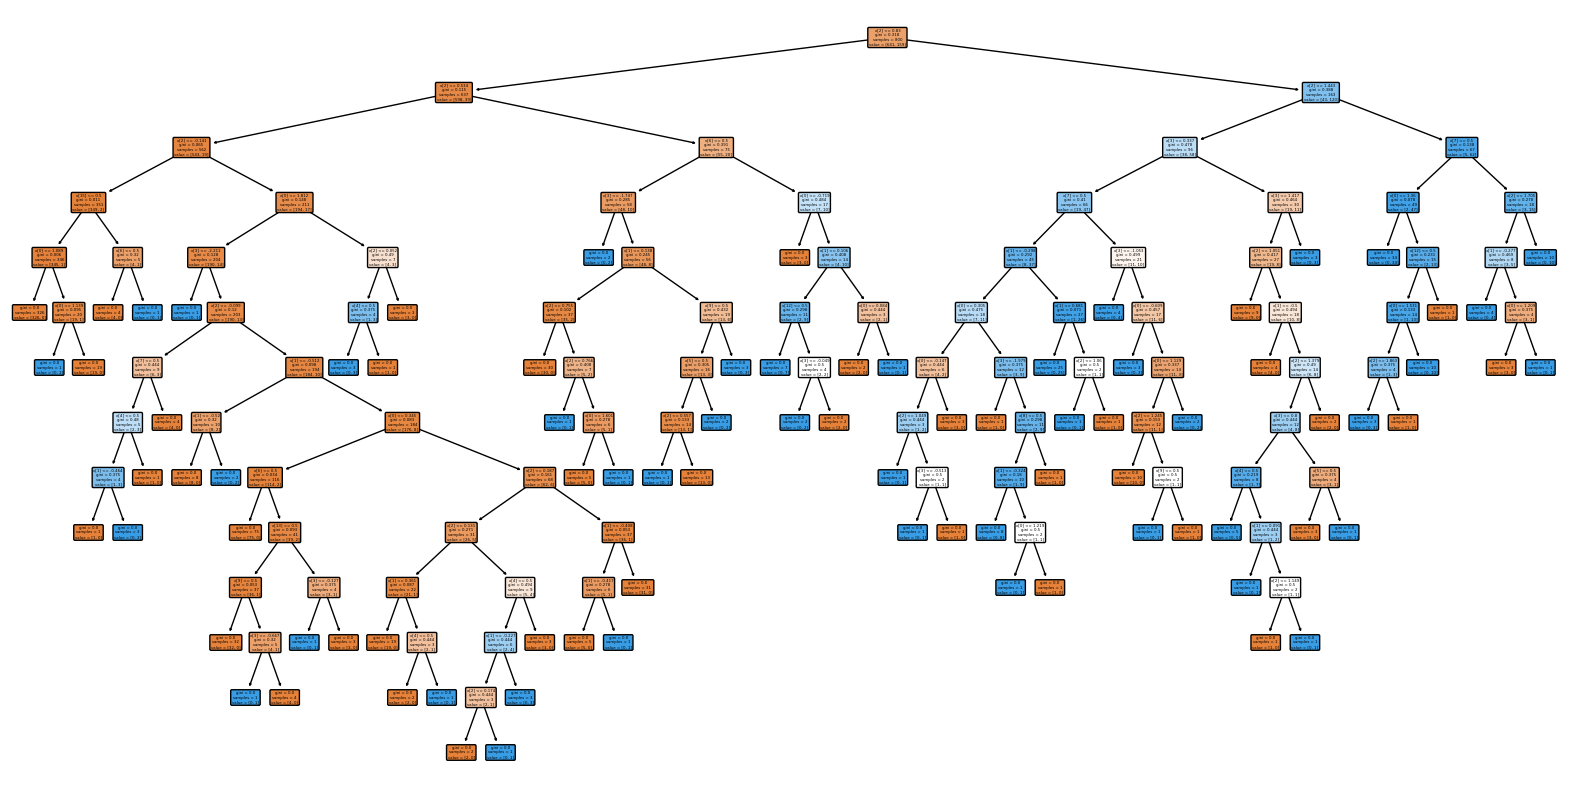

In [52]:
plt.figure(figsize=(20, 10))
plot_tree(clf.named_steps['classifier'], filled=True, rounded= True)
plt.show()

***Answer of the question 4:***

In [53]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'classifier__max_depth': [3, 5, 7, 9],
    'classifier__max_features': [5, 10, 15],
    'classifier__max_leaf_nodes': [10, 20, 30, 40],
}

grid_search= GridSearchCV(clf, param_grid, cv = 5, scoring = 'accuracy', return_train_score= True)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_clf = grid_search.best_estimator_

y_train_pred_best = best_clf.predict(X_train)
y_test_pred_best = best_clf.predict(X_test)

train_accuracy_best = accuracy_score(y_train, y_train_pred_best)
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)


print("Best Hyperemeters:", best_params)
print("Train Accuracy Best Hyperemeters:", train_accuracy_best)
print('Test Accuracy Best Hyperemeters:', test_accuracy_best)


Best Hyperemeters: {'classifier__max_depth': 3, 'classifier__max_features': 15, 'classifier__max_leaf_nodes': 40}
Train Accuracy Best Hyperemeters: 0.90125
Test Accuracy Best Hyperemeters: 0.875
